<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 11

**Nama :** Muhamad Anang Abdullah Faqih

**Kelas :** D4 TI 3D

**NIM :** 2241720070

1.
Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

akses drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

import library

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

input image

In [2]:
img = cv.imread('/content/drive/MyDrive/Images/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/Images/Object Detection/cat2_templatejpg.jpg')


Function template matching

In [3]:
def template_matching(img, template, method, method_name):
    result = cv.matchTemplate(img, template, method)

    # Mengambil min_loc dan max_loc dari hasil pencocokan
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    # Jika metode TM_SQDIFF atau TM_SQDIFF_NORMED, maka gunakan min_loc, jika tidak gunakan max_loc
    if method_name in ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc

    # Mendapatkan ukuran template
    h, w = template.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Menggambar rectangle di gambar input
    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    # Mengonversi gambar dari BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Menampilkan hasil
    plt.figure(figsize=(15, 5))
    plt.suptitle(method_name, size=20)
    plt.subplot(121), plt.imshow(result, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_rgb)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()

Menjalankan template matching

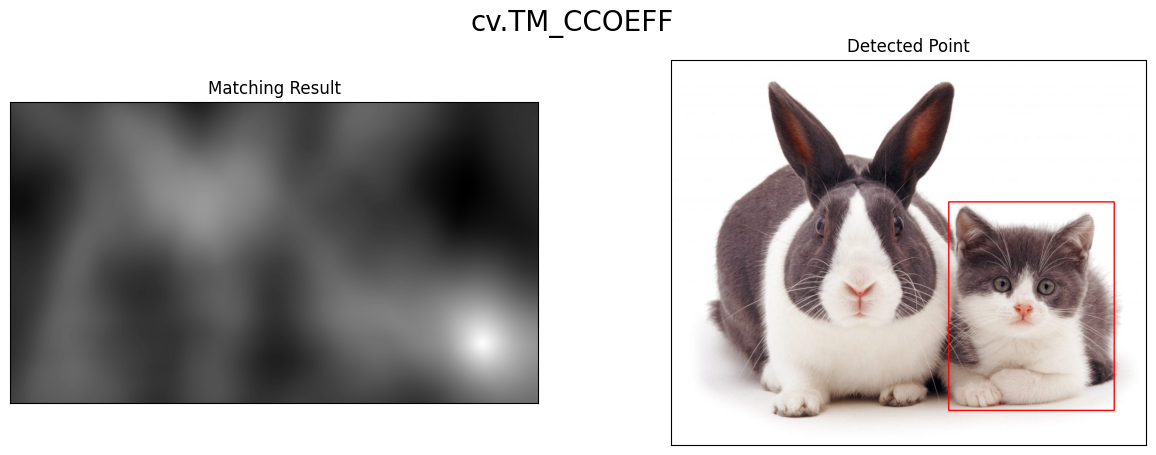

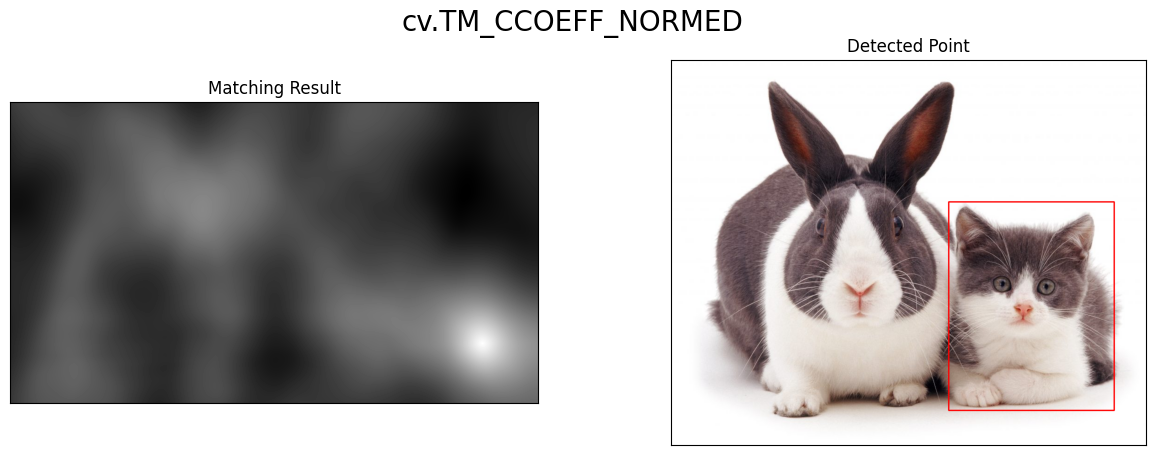

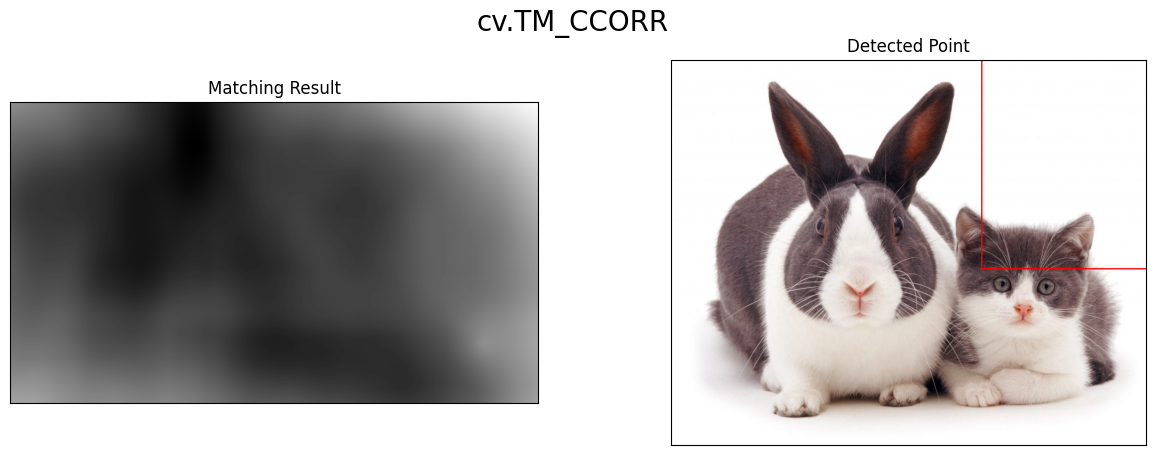

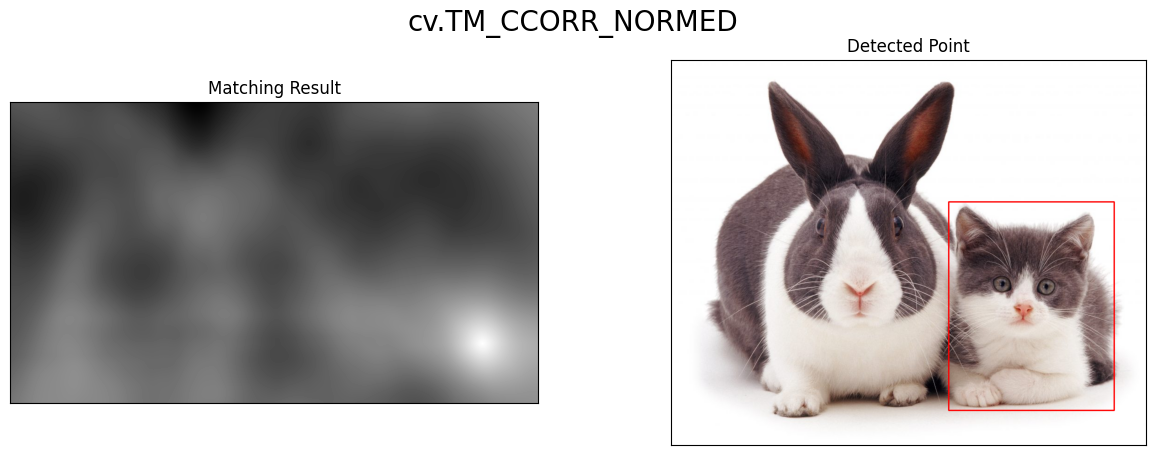

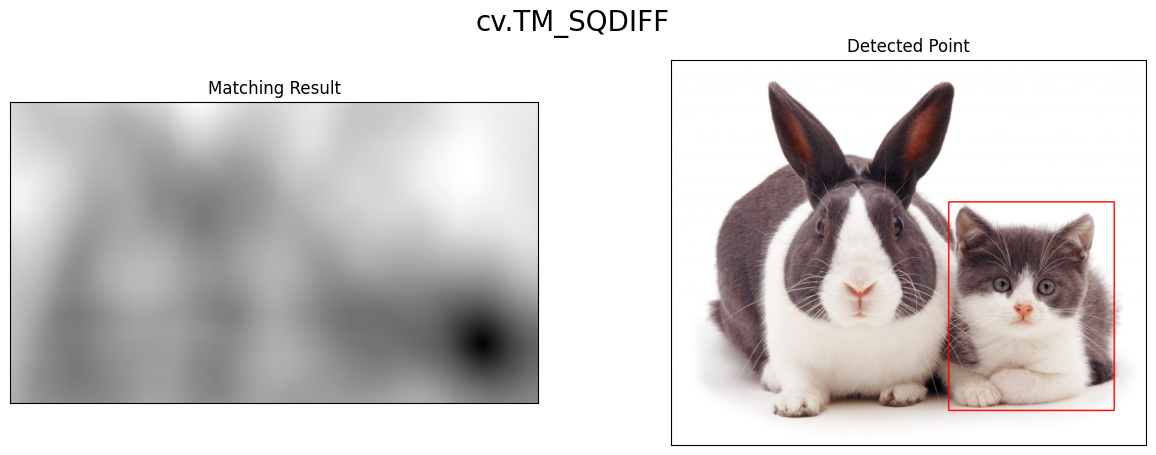

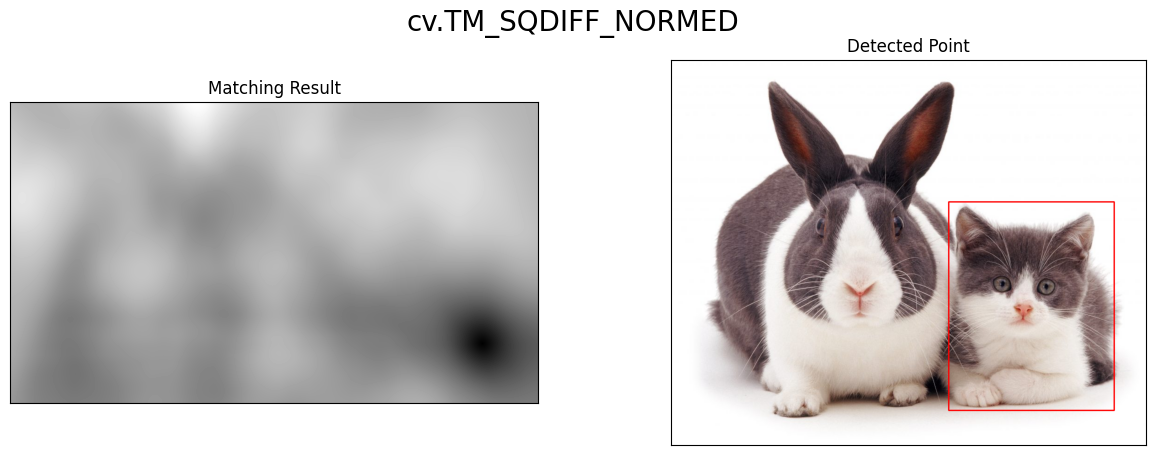

In [4]:
methods = [
    (cv.TM_CCOEFF, "cv.TM_CCOEFF"),
    (cv.TM_CCOEFF_NORMED, "cv.TM_CCOEFF_NORMED"),
    (cv.TM_CCORR, "cv.TM_CCORR"),
    (cv.TM_CCORR_NORMED, "cv.TM_CCORR_NORMED"),
    (cv.TM_SQDIFF, "cv.TM_SQDIFF"),
    (cv.TM_SQDIFF_NORMED, "cv.TM_SQDIFF_NORMED")
]

for method, method_name in methods:
    template_matching(img.copy(), template.copy(), method, method_name)

3.
Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

import library

In [3]:
from skimage import io, transform

import gambar

In [6]:
img2 = cv.imread('/content/drive/MyDrive/Images/Object Detection/bahrain.jpg')
template2 = cv.imread('/content/drive/MyDrive/Images/Object Detection/bahrain-template.jpg')

function multiple template matching

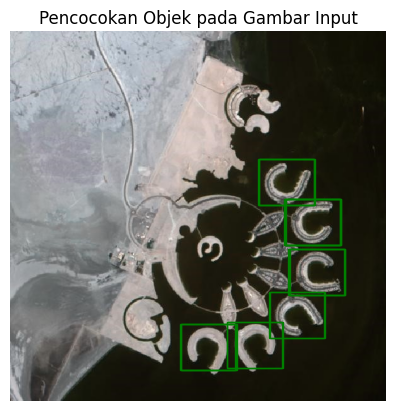

In [10]:
# Fungsi untuk mencocokkan template
def multiple_template_matching(input_image, template_list, initial_thresh=350000, max_thresh=7000000, thresh_step=50000):
    detected_positions = []

    # Konversi input image menjadi grayscale
    gray_input_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

    for template in template_list:
        # Konversi template menjadi grayscale
        gray_template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

        # Dapatkan ukuran template
        t_height, t_width = gray_template.shape

        threshold = initial_thresh
        is_matched = False

        # Loop untuk mencocokkan template sampai ditemukan kecocokan atau threshold maksimum
        while not is_matched and threshold <= max_thresh:
            matches_found = 0

            for y in range(gray_input_image.shape[0] - t_height):
                for x in range(gray_input_image.shape[1] - t_width):
                    # Subregion dari input image
                    input_subsection = gray_input_image[y:y + t_height, x:x + t_width]

                    # Hitung SSD (Sum of Squared Differences)
                    ssd_value = np.sum((input_subsection - gray_template) ** 2)

                    # Jika nilai SSD di bawah threshold, anggap sebagai match
                    if ssd_value < threshold:
                        matches_found += 1
                        detected_positions.append((y, x))
                        is_matched = True

                        # Batasi kecocokan hanya sampai 5 kali untuk tiap template
                        if matches_found >= 5:
                            break
                if is_matched:
                    break

            # Naikkan threshold jika tidak ada match
            if not is_matched:
                threshold += thresh_step

    return detected_positions

# Fungsi untuk merotasi gambar
def rotate_and_augment(image, degree):
    img_height, img_width = image.shape[:2]
    rot_matrix = cv.getRotationMatrix2D((img_width / 2, img_height / 2), degree, 1)
    rotated_img = cv.warpAffine(image, rot_matrix, (img_width, img_height))
    return rotated_img

# Augmentasi template dengan rotasi dan flipping
augmented_template_list = [
    template2,
    np.fliplr(rotate_and_augment(template2, 110)),
    rotate_and_augment(template2, 300),
    np.fliplr(rotate_and_augment(template2, 160)),
    rotate_and_augment(template2, 240),
    np.fliplr(rotate_and_augment(template2, 230)),
]

# Panggil fungsi template matching
detected_locations = multiple_template_matching(img2, augmented_template_list)

# Visualisasi hasil pencocokan
fig, axis = plt.subplots()
axis.imshow(img2, cmap='gray')

# Dapatkan dimensi template
template_h, template_w, _ = template2.shape

# Gambar rectangle di setiap posisi yang terdeteksi
for (y, x) in detected_locations:
    rectangle = plt.Rectangle((x, y), template_w, template_h, edgecolor='green', facecolor='none', linewidth=1)
    axis.add_patch(rectangle)

plt.title("Pencocokan Objek pada Gambar Input")
plt.axis("off")
plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

In [9]:
img3 = cv.imread('/content/drive/MyDrive/Images/Object Detection/car-park.jpg')
gray_image = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

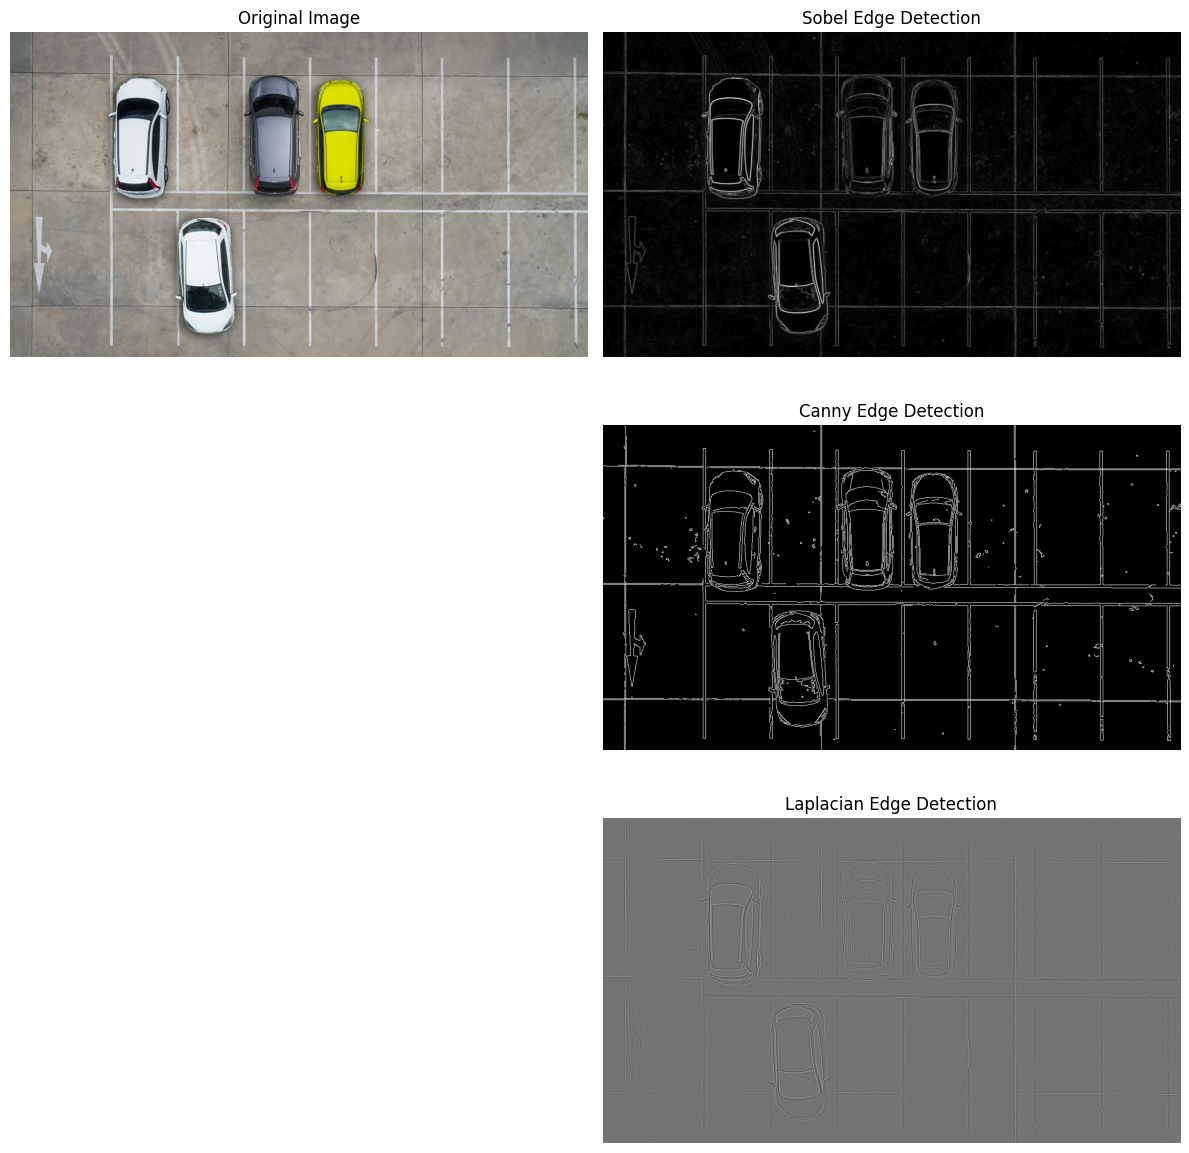

In [14]:
# Sobel Edge Detection
sobel_x = cv.Sobel(gray_image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(gray_image, cv.CV_64F, 0, 1, ksize=3)
sobel = np.hypot(sobel_x, sobel_y)

# Canny Edge Detection
canny = cv.Canny(gray_image, 100, 200)

# Laplacian Edge Detection
laplacian = cv.Laplacian(gray_image, cv.CV_64F)

# Visualisasi hasil deteksi tepi
plt.figure(figsize=(12, 12))

# Gambar asli
plt.subplot(3, 2, 1)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Hasil Sobel
plt.subplot(3, 2, 2)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")

# Hasil Canny
plt.subplot(3, 2, 4)
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

# Hasil Laplacian
plt.subplot(3, 2, 6)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis("off")

# Menampilkan semua plot
plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg.

In [16]:
img4 = cv.imread('/content/drive/MyDrive/Images/Object Detection/chess-board.jpg')
gray_image = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

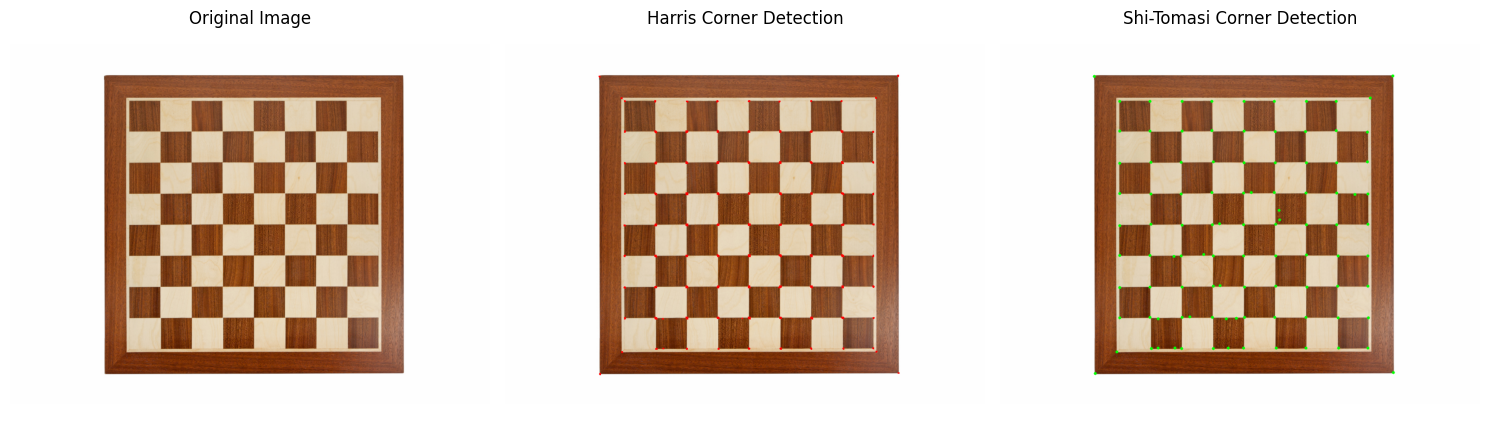

In [19]:

# Harris Corner Detection
gray_harris = np.float32(gray_image)
harris_corners = cv.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)

# Dilation
harris_corners = cv.dilate(harris_corners, None)

# Salin gambar
harris_result = img4.copy()

# Tandai sudut
harris_result[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
shi_tomasi_corners = cv.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Mengonversi koordinat ke integer
shi_tomasi_corners = np.intp(shi_tomasi_corners)

# Salin gambar
shi_tomasi_result = img4.copy()

# Tandai sudut Shi-Tomasi
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv.circle(shi_tomasi_result, (x, y), 3, (0, 255, 0), -1)  # Gambar lingkaran di sekitar sudut

# Visualisasi hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Hasil Harris Corner Detection
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(harris_result, cv.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")

# Hasil Shi-Tomasi Corner Detection
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(shi_tomasi_result, cv.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

In [20]:
img5 = cv.imread('/content/drive/MyDrive/Images/Object Detection/sudoku.jpg')
gray_image = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

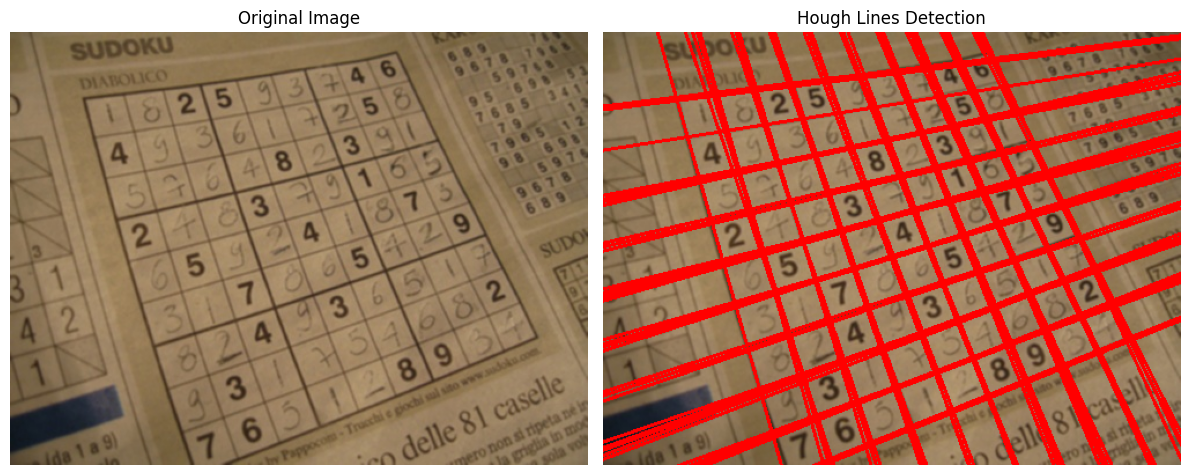

In [25]:
# deteksi tepi dengan canny
edges = cv.Canny(gray_image, threshold1=100, threshold2=140)

# hough line transforms dengan parameter rho, teta, dan threshold
detected_lines = cv.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=140)

# result deteksi garis
image_detected_lines = img5.copy()

# jika garis terdeteksi
if detected_lines is not None:
    for line in detected_lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Gambar garis
        cv.line(image_detected_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# visualisasi hasil
plt.figure(figsize=(12, 6))

# result
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# gambar dg garis
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_detected_lines, cv.COLOR_BGR2RGB))
plt.title("Hough Lines Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan  menggunakan gambar laptop.jpg.


In [ ]:
img6 = cv.imread('/content/drive/MyDrive/Images/Object Detection/laptop.jpg')
gray_image = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)

In [ ]:
# gaussianblur
blurred = cv.gaussianBlur(gray_image, (7, 7), 0)

# Canny edge
edges_detected = cv.Canny(blurred, 75, 200)

# find contours
contours, hierarchy = cv.findContours(edges_detected, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#  buat salinan
image_counturs = img6.copy()

# gambar kontur
cv.drawContours(image_counturs, contours, -1, (0, 255, 0), 2)

#

## E. Pengayaan Materi KTP

In [ ]:
import cv2 as cv
import os

#  Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban
ktp = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/KTP_More/KTP_More/ktp3.png')

# Menerapkan Gaussian Blur
blurred = cv.GaussianBlur(ktp.copy(), (5, 5), 0.5)

# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

plt.imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))

In [ ]:
_, binary_image = cv.threshold(bw, 128, 255, cv.THRESH_BINARY_INV)

# Kernel untuk operasi morfologi
kernel = np.ones((2, 2), np.uint8)

# Operasi morfologi: Opening untuk memisahkan karakter
morph_image = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel, iterations=1)

# Visualisasi hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ktp,cv.COLOR_BGR2RGB), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binarized Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(morph_image, cmap='gray')
plt.title("Morphological Operation Applied")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Temukan kontur
contours, _ = cv.findContours(morph_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Tentukan batasan ukuran dan rasio untuk karakter NIK
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, 0.9)

# Gambar asli untuk visualisasi kontur
output_image = ktp.copy()

for contour in contours:
    # Dapatkan bounding box dari setiap kontur
    x, y, w, h = cv.boundingRect(contour)

    # Hitung area dan rasio aspek dari bounding box
    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    # Filter kontur berdasarkan ukuran dan rasio aspek
    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        # Gambar bounding box pada karakter yang terdeteksi
        cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Visualisasi hasil
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ktp,cv.COLOR_BGR2RGB), cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(morph_image, cmap='gray')
plt.title("Morphological Processed Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(output_image,cv.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.axis("off")

plt.tight_layout()
plt.show()

#2

In [ ]:
ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/ktp3.png')

blurred = ktp.copy()
gray = blurred.copy()

In [ ]:
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

In [ ]:
ret, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

In [ ]:
bw

In [ ]:
kernel = np.ones((2, 2), np.uint8)
morph_image = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

final_image = cv.bitwise_not(morph_image)

In [ ]:
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
contours, hierarchy = cv.findContours(final_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, 0.9)

output_image = ktp.copy()

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

In [ ]:
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 8. Tugas Praktikum

In [ ]:
ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/ktp1.png')

blurred = ktp.copy()
gray = blurred.copy()

In [ ]:
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

In [ ]:
ret, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

In [ ]:
bw

In [ ]:
kernel = np.ones((2, 2), np.uint8)
morph_image = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

final_image = cv.bitwise_not(morph_image)

In [ ]:
plt.imshow(final_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
contours, hierarchy = cv.findContours(final_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, 0.9)

output_image = ktp.copy()

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)

    area = cv.contourArea(contour)
    aspect_ratio = float(w) / h

    if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
        cv.rectangle(output_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

In [ ]:
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()